#### Problem 1: Fuzzy Logic-Based Pressure Cooker ​

Implement a fuzzy logic-based system to build a smart pressure cooker using python. The pressure cooker requires two variables to work appropriately. The following table shows the variables along with their universe and fuzzy set. The Table also shows the rules used for the pressure cooker to adjust the pressure level and temperature according to food_type (soft (e.g., fish/vegetables), medium (e.g., chicken), and hard (e.g., beef)). (Note you need Scikit-Fuzzy library to perform this task). 
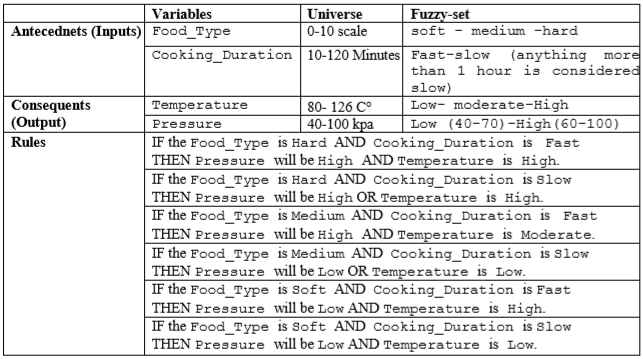

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
# Import NumPy, scikit-fuzzy and matpolt
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

##### 1. First create fuzzy membership functions to represent the membership functions of the two fuzzy variables describing the Food_type , the Cooking_duration, the pressure level, and the temperature(Note, you can use either triangular or trapezoidal membership function, but you MUST divide the universe equally unless it is specified above). 

In [32]:
# Generate universe functions
food_type = np.arange(0, 11, 1)
cooking_duration = np.arange(10, 121, 1)
pressure = np.arange(40, 101, 1)
temperature = np.arange(80, 127, 1)

# Generate membership functions for food_type
f_soft = fuzz.trimf(food_type, [0, 0, 5])
f_medium = fuzz.trimf(food_type, [0, 5, 10])
f_hard = fuzz.trimf(food_type, [5,10,10])

# Generate membership functions for cooking_duration
c_fast = fuzz.trimf(cooking_duration, [10, 10, 60])
c_slow = fuzz.trimf(cooking_duration, [60, 120, 120])

# Generate membership functions for pressur
p_low = fuzz.trimf(pressure, [40, 40, 70])
p_high = fuzz.trimf(pressure, [60, 100, 100])

# Generate membership functions for temperature
t_low = fuzz.trimf(temperature, [80, 80, 103])
t_moderate = fuzz.trimf(temperature, [80, 103, 126])
t_high = fuzz.trimf(temperature, [103, 126, 126])

##### 2. Show plots of the created fuzzy membership functions. 

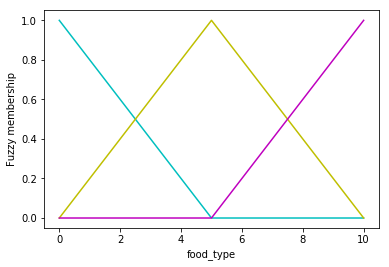

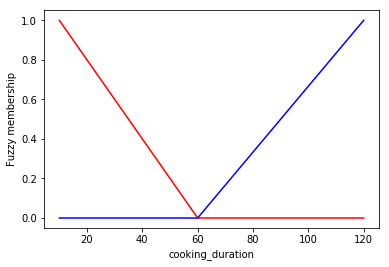

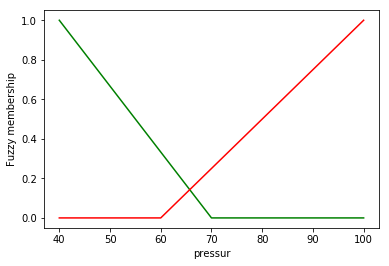

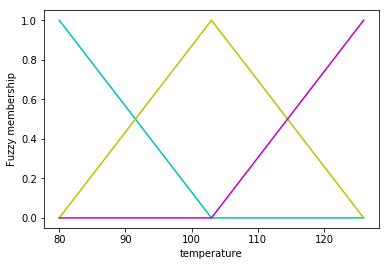

In [33]:
# Visualize membership functions for food_type
fig, ax = plt.subplots()
plt.plot(food_type,f_soft,'c',food_type,f_medium,'y',food_type,f_hard,'m')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('food_type')
ax.set_ylim(-0.05, 1.05);


# Visualize membership functions for cooking_duration
fig, ax = plt.subplots()
plt.plot(cooking_duration,c_fast,'r',cooking_duration,c_slow,'b',label= "fast")
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('cooking_duration')
ax.set_ylim(-0.05, 1.05);


# Visualize membership functions for pressur
fig, ax = plt.subplots()
plt.plot(pressure,p_low ,'g',pressure,p_high ,'r')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('pressur')
ax.set_ylim(-0.05, 1.05);


# Visualize membership functions for temperature
fig, ax = plt.subplots()
plt.plot(temperature,t_low,'c',temperature,t_moderate,'y',temperature,t_high,'m')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('temperature')
ax.set_ylim(-0.05, 1.05);


#### 3. Perform fuzzy rules evaluation and aggregation (you MUST use Mamdani inference style). 
1- IF the Food_Type is Hard  AND  Cooking_Duration is  Fast  
THEN Pressure will be High AND Temperature is High.

2- IF the Food_Type is Hard  AND  Cooking_Duration is Slow    
THEN Pressure will be High OR Temperature is High. 

3- IF the Food_Type is Medium  AND  Cooking_Duration is  Fast  
THEN Pressure will be High AND Temperature is Moderate.

4- IF the Food_Type is Medium  AND  Cooking_Duration is Slow  
THEN Pressure will be Low OR Temperature is Low. 

5- IF the Food_Type is Soft  AND  Cooking_Duration is Fast  
THEN Pressure will be Low AND Temperature is High. 

6- IF the Food_Type is Soft  AND  Cooking_Duration is Slow  
THEN Pressure will be Low AND Temperature is Low. 

In [34]:
# here I activate the membership of the food type and cooking duration with the values of the query.
# Food type activation with the query
food_type_soft = fuzz.interp_membership(food_type, f_soft, 4.6)
food_type_medium = fuzz.interp_membership(food_type, f_medium, 4.6)
food_type_hard = fuzz.interp_membership(food_type, f_hard, 4.6)
# Cooking duration activation with the query
cooking_level_fast = fuzz.interp_membership(cooking_duration, c_fast,30)
cooking_level_slow = fuzz.interp_membership(cooking_duration, c_slow, 30)

# Activation(if part).
# take the minimum value by fmin because the and operator between the lingustic variavles in if part
# Rule 1 IF the Food_Type is Hard AND Cooking_Duration is Fast
R1 = np.fmin(food_type_hard, cooking_level_fast)
# Rule 2 IF the Food_Type is Hard AND Cooking_Duration is Slow
R2 = np.fmin(food_type_hard, cooking_level_slow)
# Rule 3 IF the Food_Type is Medium AND Cooking_Duration is Fast
R3 = np.fmin(food_type_medium, cooking_level_fast)
# Rule 4 IF the Food_Type is Medium AND Cooking_Duration is Slow
R4 = np.fmin(food_type_medium, cooking_level_slow)
# Rule 5 IF the Food_Type is Soft AND Cooking_Duration is Fast
R5 = np.fmin(food_type_soft, cooking_level_fast)
# Rule 6 IF the Food_Type is Soft AND Cooking_Duration is Slow
R6 = np.fmin(food_type_soft, cooking_level_slow)

#processing then part for Temperature
# High temp
# rule 1,2,5 consider the temperature is high, so to evalueate these rules with temp i took the maximum of them
h_temp = np.fmax(R1, np.fmax(R2,R5))
# now to get the final result of the evaluation for this part i took the minimum between the result of the above 
# and high temperature value
h_tempA = np.fmin (h_temp,t_high)
# moderate temp
# i made the aggergation immediatly with rule 3 becuase it is the only one with moderate tempreture
m_tempA = np.fmin (R3,t_moderate)
# low temp
# rule 4,6 consider the temperature is low, so to evaluate these rules with temp i took the maximum of them
l_temp = np.fmax(R4,R6)
# now to get the final result of the evalaution for this part i took the minimum between the result of the above 
# and low temperature value
l_tempA = np.fmin (l_temp,t_low)

#processing then part for pressure
# high
# rule 1,2,3 consider the pressure is high, so to evaluate these rules with temp i took the maximum of them
h_press = np.fmax(R1, np.fmax(R2,R3))
# now to get the final result of the evaluation for this part i took the minimum between the result of the above 
# and high pressure value
h_pressA = np.fmin (h_press,p_high)
# low
# rule 4,5,6 consider the pressure is low, so to evaluate these rules with temp i took the maximum of them
l_press = np.fmax(R4, np.fmax(R5,R6))
# now to get the final result of the evaluation for this part i took the minimum between the result of the above 
# and low pressure value
l_pressA = np.fmin (l_press,p_low)

# Aggregation Temperture 
# Aggregate all three output of temperature membership functions after got them from the previos step
ag_tem = np.fmax(h_tempA,np.fmax(m_tempA, l_tempA))

# Aggregation Pressure 
# Aggregate all three output of pressure membership functions after got them from the previos step
ag_pres = np.fmax(h_pressA,l_pressA)

Text(0.5,1,'Temperature Output ')

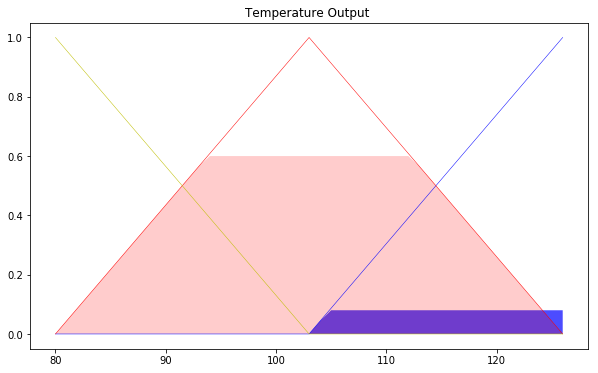

In [39]:
# Visualize temperature fuzzy membership after evaluation processing
fig, ax0 = plt.subplots(figsize=(10,6))
temp = np.zeros_like(temperature)
ax0.fill_between(temperature, temp, h_tempA, facecolor='b', alpha=0.7)
ax0.plot(temperature, t_high, 'b', linewidth=0.5, linestyle='-', )
ax0.fill_between(temperature, temp, m_tempA, facecolor='R', alpha=0.20)
ax0.plot(temperature, t_moderate, 'R', linewidth=0.5, linestyle='-')
ax0.fill_between(temperature, temp, l_tempA, facecolor='y', alpha=0.7)
ax0.plot(temperature, t_low, 'y', linewidth=0.5, linestyle='-')
ax0.set_title('Temperature Output ')

Text(0.5,1,'Pressure output')

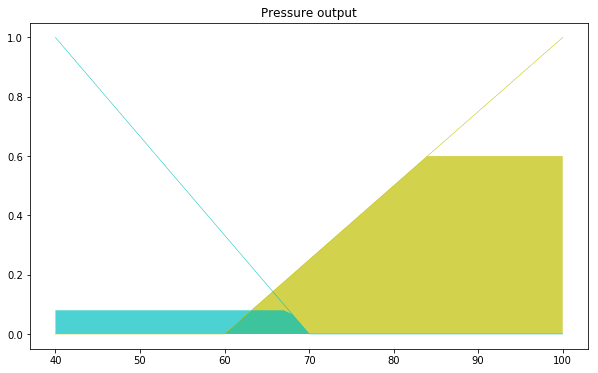

In [40]:
# Visualize pressure fuzzy membership after evaluation processing
fig, ax0 = plt.subplots(figsize=(10,6))
pres = np.zeros_like(pressure)
ax0.fill_between(pressure, pres, h_pressA, facecolor='Y', alpha=0.7)
ax0.plot(pressure, p_high, 'Y', linewidth=0.5, linestyle='-', )
ax0.fill_between(pressure, pres, l_pressA, facecolor='C', alpha=0.7)
ax0.plot(pressure, p_low, 'C', linewidth=0.5, linestyle='-')
ax0.set_title('Pressure output')

##### 5- Show a plot of the predicted defuzzified relation and the given query.

Text(0.5,1,'Aggregated temperature memberships with result (line)')

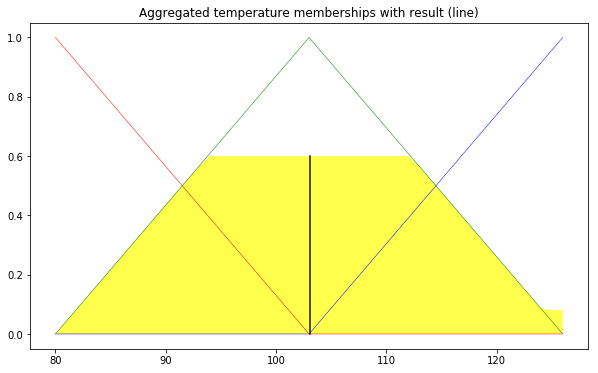

In [41]:
# Calculate deffizication result
tem = fuzz.defuzz(temperature, ag_tem, 'centroid')
# needed this step for drawing the plot
temA = fuzz.interp_membership(temperature, ag_tem, tem) 
# Visualize the deffizication output of the temperature
fig, ax0 = plt.subplots(figsize=(10, 6))
ax0.plot(temperature, t_high, 'b', linewidth=0.5, linestyle='-', )
ax0.plot(temperature, t_moderate, 'g', linewidth=0.5, linestyle='-')
ax0.plot(temperature, t_low, 'r', linewidth=0.5, linestyle='-')
ax0.fill_between(temperature, temp, ag_tem, facecolor='Yellow', alpha=0.7)
ax0.plot([tem, tem], [0, temA], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated temperature memberships with result (line)')

Text(0.5,1,'Aggregated pressure memberships with result (line)')

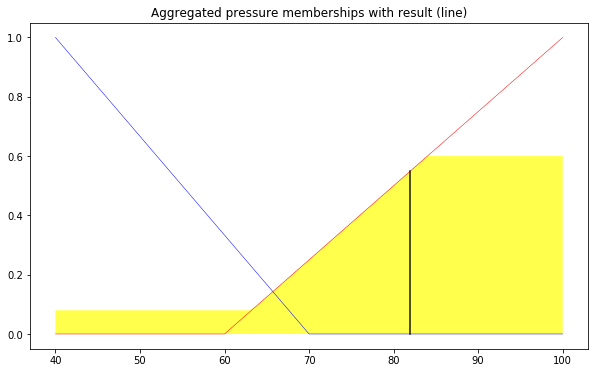

In [42]:
# Calculate deffizication result
pres1 = fuzz.defuzz(pressure, ag_pres, 'centroid')
# needed this step for drawing the plot
presA = fuzz.interp_membership(pressure, ag_pres, pres1)
# Visualize the deffizication output of the pressure
fig, ax0 = plt.subplots(figsize=(10, 6))
ax0.plot(pressure, p_high, 'r', linewidth=0.5, linestyle='-', )
ax0.plot(pressure, p_low, 'b', linewidth=0.5, linestyle='-', )
ax0.fill_between(pressure, pres, ag_pres, facecolor='Yellow', alpha=0.7)
ax0.plot([pres1, pres1], [0, presA], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated pressure memberships with result (line)')